In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solución de la ecuación de advección lineal

In [2]:
def condicion_inicial(n_x = 80, n_t = 30, c=1.0):
    x = np.linspace(0, 2.0, n_x)
    dx = x[1]-x[0] 

    u = np.ones(n_x)
    ii = (x<1.25) & (x>0.75)
    u[ii] = 2.0

    t_max = 0.3
    dt = t_max/n_t

    sigma = c * dt/dx
    return x, u, n_x, n_t, sigma

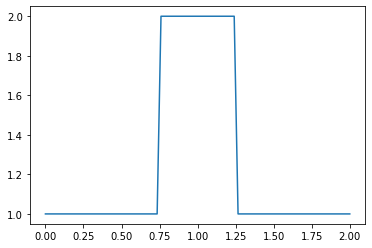

In [3]:
x, u, sigma, n_x, n_t = condicion_inicial()
plt.plot(x, u)

In [4]:
def lineal(u_inicial, n_x, n_t, sigma):
    u = u_inicial.copy()
    n_x = len(u)
    for j in range(n_t):
        u_past = u.copy()
        for i in range(1,n_x-1):
            u[i] = u_past[i] - sigma * (u_past[i]-u_past[i-1])
    return u

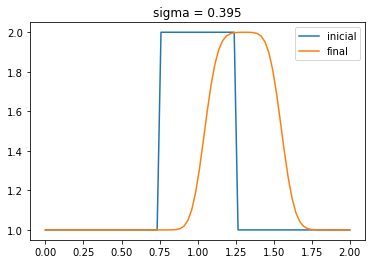

In [5]:
x, u, n_x, n_t, sigma = condicion_inicial()
u_final = lineal(u, n_x, n_t, sigma)
plt.plot(x, u, label='inicial')
plt.plot(x, u_final, label='final')
plt.title('sigma = {}'.format(sigma))
plt.legend()

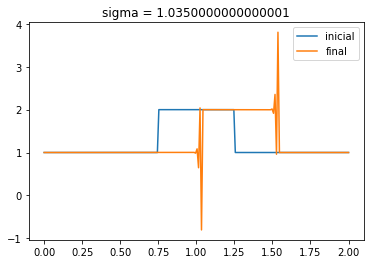

In [6]:
# ahora veamos el efecto de tener algo inestable aumentando n_x
x, u, n_x, n_t, sigma = condicion_inicial(n_x = 208) 
u_final = lineal(u, n_x, n_t, sigma)
plt.plot(x, u, label='inicial')
plt.plot(x, u_final, label='final')
plt.title('sigma = {}'.format(sigma))
plt.legend()

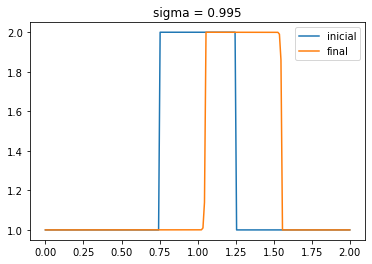

In [7]:
# ahora veamos el efecto de aumentar n_x al maximo posible, antes de ser inestable
x, u, n_x, n_t, sigma = condicion_inicial(n_x = 200) 
u_final = lineal(u, n_x, n_t, sigma)
plt.plot(x, u, label='inicial')
plt.plot(x, u_final, label='final')
plt.title('sigma = {}'.format(sigma))
plt.legend()

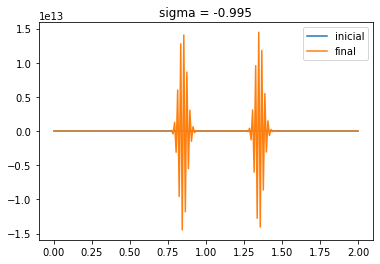

In [9]:
# que pasa ahora si la velocidad, c, es negativa

x, u, n_x, n_t, sigma = condicion_inicial(c=-1.0, n_x = 200) 
u_final = lineal(u, n_x, n_t, sigma)
plt.plot(x, u, label='inicial')
plt.plot(x, u_final, label='final')
plt.title('sigma = {}'.format(sigma))
plt.legend()

In [10]:
# en el caso de velocidad negativa se cambia el esq
def lineal(u_inicial, n_x, n_t, sigma):
    u = u_inicial.copy()
    n_x = len(u)
    for j in range(n_t):
        u_past = u.copy()
        for i in range(1,n_x-1):
            if sigma>0:
                u[i] = u_past[i] - sigma * (u_past[i]-u_past[i-1])
            if sigma<0:
                u[i] = u_past[i] - sigma * (u_past[i+1]-u_past[i]) # esto es lo unico que debe cambiar

    return u

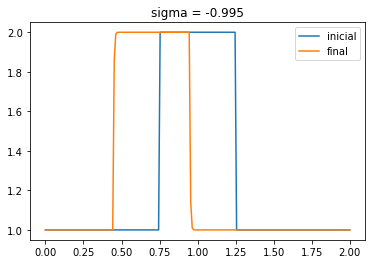

In [12]:
# que pasa ahora si la velocidad, c, es negativa

x, u, n_x, n_t, sigma = condicion_inicial(c=-1.0, n_x = 200) 
u_final = lineal(u, n_x, n_t, sigma)
plt.plot(x, u, label='inicial')
plt.plot(x, u_final, label='final')
plt.title('sigma = {}'.format(sigma))
plt.legend()

In [13]:
# Solución de la ecuación de advección NO-lineal

In [78]:
def condicion_inicial(n_x = 80, n_t = 30):
    x = np.linspace(0, 2.0, n_x)
    dx = x[1]-x[0] 

    u = np.exp(-0.5*((x-1.0)/0.25)**2) + 1.0

    t_max = 0.2
    dt = t_max/n_t

    return x, u, n_x, n_t, dx, dt

def nolineal(u_inicial, n_x, n_t, dt, dx):
    u = u_inicial.copy()
    n_x = len(u)
    for j in range(n_t):
        u_past = u.copy()
        for i in range(1,n_x-1):
            u[i] = u_past[i] - u_past[i] * (dt/dx) *(u_past[i]-u_past[i-1])
    return u

0.006666666666666667 0.006688963210702341 0.9966666666666667


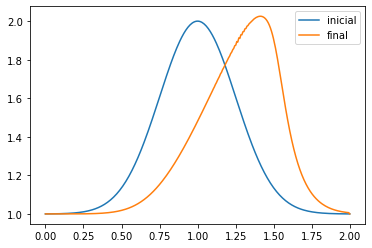

In [79]:
x, u, n_x, n_t, dx, dt = condicion_inicial(n_x = 300) 
print(dt, dx, dt/dx)
u_final = nolineal(u, n_x, n_t, dx, dt)
#print(u_final)
plt.plot(x, u, label='inicial')
plt.plot(x, u_final, label='final')
plt.legend()